In [1]:
!pip --version
!pip install --upgrade tensorflow

pip 20.2.4 from /opt/conda/lib/python3.8/site-packages/pip (python 3.8)
Requirement already up-to-date: tensorflow in /opt/conda/lib/python3.8/site-packages (2.8.0)


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/data.csv')
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
423,2014-05-09 00:00:00,463000.0,2.0,1.00,1150,4400,1.0,0,0,4,1150,0,1905,0,401 31st Ave E,Seattle,WA 98112,USA
3641,2014-06-30 00:00:00,370000.0,3.0,1.00,1320,7341,1.0,0,0,3,1320,0,1982,0,14744 31st Ave NE,Shoreline,WA 98155,USA
1578,2014-05-29 00:00:00,723000.0,4.0,2.25,1960,8680,1.0,0,0,4,1290,670,1959,0,233 111th Ave SE,Bellevue,WA 98004,USA
1700,2014-06-02 00:00:00,675000.0,3.0,2.25,2610,9002,2.0,0,0,3,2610,0,1988,2000,10090 177th Ave NE,Redmond,WA 98052,USA
3105,2014-06-23 00:00:00,405000.0,2.0,1.00,860,2599,1.0,0,0,4,860,0,1901,0,6301-6399 17th Ave NW,Seattle,WA 98107,USA


In [3]:
# pre-process data 
# drop non-numeric columns 

to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [4]:
# How old is the house?
df['house_age'] = [2021 - yr_built for yr_built in df['yr_built']]
# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0 
    for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2021 - yr_renovated) <= 10 
    else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2021 - yr_renovated) <= 30
    else 0 for yr_renovated in df['yr_renovated']]
# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1


In [5]:
def remap_location(data: pd.DataFrame, 
                   location: str, 
                   threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [6]:
df['city'] = df['city'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
837,490000.0,2.0,1.00,1160,5000,1.0,0,0,4,1160,0,Seattle,84,0,0,0
2617,468500.0,3.0,2.50,1350,1186,2.0,0,0,3,1120,230,Seattle,14,0,0,0
3470,710000.0,3.0,3.25,3740,136915,2.5,0,0,3,3100,640,Burien,31,1,0,1
2142,270000.0,4.0,2.75,1990,7252,1.0,0,0,3,1270,720,Auburn,22,0,0,0
3700,800000.0,3.0,3.50,3830,221284,2.0,0,0,3,3530,300,Woodinville,28,0,0,0
4341,375000.0,6.0,2.25,3206,5793,2.0,0,0,3,3206,0,Kent,9,1,0,0
3325,315000.0,4.0,2.00,1780,5336,1.5,0,0,5,930,850,Seattle,103,0,0,0
3212,339000.0,3.0,1.00,1100,4128,1.0,0,0,4,720,380,Seattle,79,1,0,0
3838,690000.0,3.0,1.50,1760,4000,2.0,0,0,3,1760,0,Seattle,99,1,0,1
2824,429900.0,4.0,2.50,2640,8625,2.0,0,0,3,2640,0,Renton,34,1,0,1


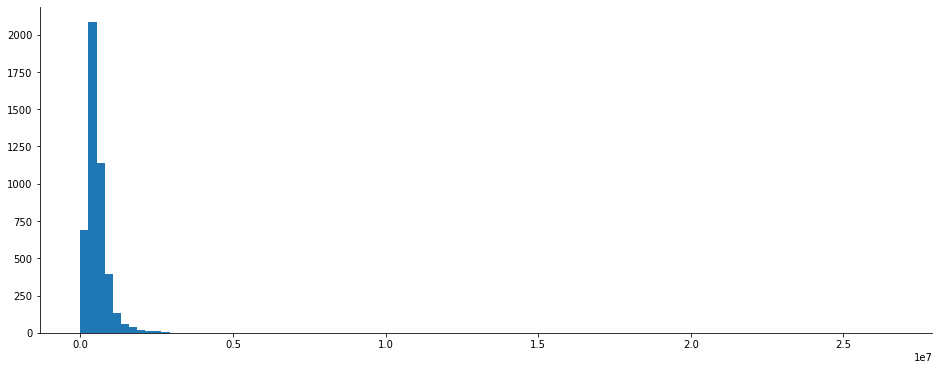

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.hist(df['price'], bins=100);


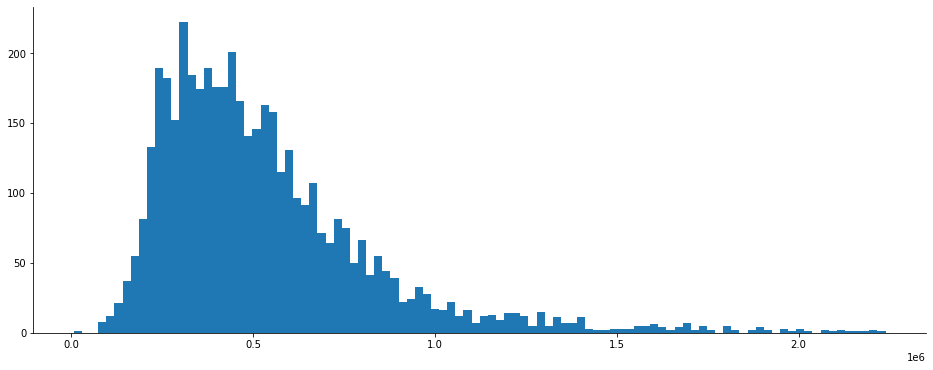

In [9]:
#remove z scores with a standard deviation greater than 3 
from scipy import stats
# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))
# Filter out outliers
df = df[df['price_z'] <= 3]
# Remove houses listed for $0
df = df[df['price'] != 0]
# Drop the column
df = df.drop('price_z', axis=1)
# Draw a histogram
plt.hist(df['price'], bins=100);

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['sqft_living', 'sqft_lot','sqft_above', 
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['bedrooms', 'bathrooms', 'floors', 
         'view', 'condition'])
)

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# Fit
transformer.fit(X_train)
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [13]:
#converted feature sets to numpy array
X_train.toarray()

array([[0.21438849, 0.33897196, 0.21438849, ..., 1.        , 0.        ,
        0.        ],
       [0.26043165, 0.00742988, 0.10503597, ..., 0.        , 0.        ,
        1.        ],
       [0.55251799, 0.02588045, 0.55251799, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27194245, 0.01478794, 0.27194245, ..., 1.        , 0.        ,
        0.        ],
       [0.56115108, 0.00799192, 0.4028777 , ..., 0.        , 0.        ,
        1.        ],
       [0.21007194, 0.01236491, 0.21007194, ..., 1.        , 0.        ,
        0.        ]])

In [14]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
# BUILD THE MODEL

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [16]:
# How to track the LOSS of the model:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [17]:
tf.random.set_seed(42)
model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
113/113 [==============================] - 1s 4ms/step - loss: 607305.5000 - rmse: 607324.4375
Epoch 2/100
113/113 [==============================] - 0s 4ms/step - loss: 428813.9375 - rmse: 428630.6562
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 268001.8750 - rmse: 267976.8438
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 248637.9062 - rmse: 248579.2500
Epoch 5/100
113/113 [==============================] - 0s 4ms/step - loss: 238822.8594 - rmse: 238889.9062
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 230601.1406 - rmse: 230551.6094
Epoch 7/100
113/113 [==============================] - 0s 4ms/step - loss: 226941.2031 - rmse: 226909.4531
Epoch 8/100
113/113 [==============================] - 0s 4ms/step - loss: 222535.7969 - rmse: 222565.7656
Epoch 9/100
113/113 [==============================] - 0s 4ms/step - loss: 218661.9844 - rmse: 218605.4375
Epoch 10/100
113/113 [===============

In [18]:
predictions = model.predict(X_test)
predictions[:5]

array([[ 497919.06],
       [ 599079.7 ],
       [1229349.8 ],
       [ 277416.8 ],
       [ 321370.3 ]], dtype=float32)

In [19]:
# show in one dimensional array
predictions = np.ravel(predictions)
predictions[:5]

array([ 497919.06,  599079.7 , 1229349.8 ,  277416.8 ,  321370.3 ],
      dtype=float32)

In [20]:
rmse(y_test, predictions).numpy()


191046.3603847912